In [6]:
import os
import matplotlib.pyplot as plt

import mne


fnirs_data_folder = mne.datasets.fnirs_motor.data_path()
fnirs_raw_dir = os.path.join(fnirs_data_folder, 'Participant-1')
raw_intensity = mne.io.read_raw_nirx(fnirs_raw_dir, verbose=True).load_data()

AttributeError: module 'mne.datasets' has no attribute 'fnirs_motor'

In [ ]:
channels that are not considered to be short (less than 1 cm distance between optodes).

picks = mne.pick_types(raw_intensity.info, meg=False, fnirs=True)
dists = mne.preprocessing.nirs.source_detector_distances(
    raw_intensity.info, picks=picks)
raw_intensity.pick(picks[dists > 0.01])
raw_intensity.plot(n_channels=len(raw_intensity.ch_names), duration=500)

In [ ]:
raw_od = mne.preprocessing.nirs.optical_density(raw_intensity)
raw_od.plot(n_channels=len(raw_od.ch_names), duration=500)

In [ ]:
raw_haemo = mne.preprocessing.nirs.beer_lambert_law(raw_od)
raw_haemo.plot(n_channels=len(raw_haemo.ch_names), duration=500)

In [ ]:
fig = raw_haemo.plot_psd(average=True)
fig.suptitle('Before filtering', weight='bold', size='x-large')
fig.subplots_adjust(top=0.88)
raw_haemo = raw_haemo.filter(0.05, 0.7, h_trans_bandwidth=0.2,
                             l_trans_bandwidth=0.02)
fig = raw_haemo.plot_psd(average=True)
fig.suptitle('After filtering', weight='bold', size='x-large')
fig.subplots_adjust(top=0.88)

In [ ]:
events, _ = mne.events_from_annotations(raw_haemo, event_id={'1.0': 1,
                                                             '2.0': 2,
                                                             '3.0': 3})
event_dict = {'Control': 1, 'Tapping/Left': 2, 'Tapping/Right': 3}
fig = mne.viz.plot_events(events, event_id=event_dict,
                          sfreq=raw_haemo.info['sfreq'])
fig.subplots_adjust(right=0.7)  # make room for the legend

In [2]:
reject_criteria = dict(hbo=80e-6)
tmin, tmax = -5, 15

epochs = mne.Epochs(raw_haemo, events, event_id=event_dict,
                    tmin=tmin, tmax=tmax,
                    reject=reject_criteria, reject_by_annotation=True,
                    proj=True, baseline=(None, 0), preload=True,
                    detrend=None, verbose=True)
epochs.plot_drop_log()

NameError: name 'raw_haemo' is not defined

In [3]:
epochs['Tapping'].plot_image(combine='mean', vmin=-30, vmax=30,
                             ts_args=dict(ylim=dict(hbo=[-15, 15],
                                                    hbr=[-15, 15])))

NameError: name 'epochs' is not defined

In [4]:
epochs['Control'].plot_image(combine='mean', vmin=-30, vmax=30,
                             ts_args=dict(ylim=dict(hbo=[-15, 15],
                                                    hbr=[-15, 15])))

NameError: name 'epochs' is not defined

NameError: name 'epochs' is not defined

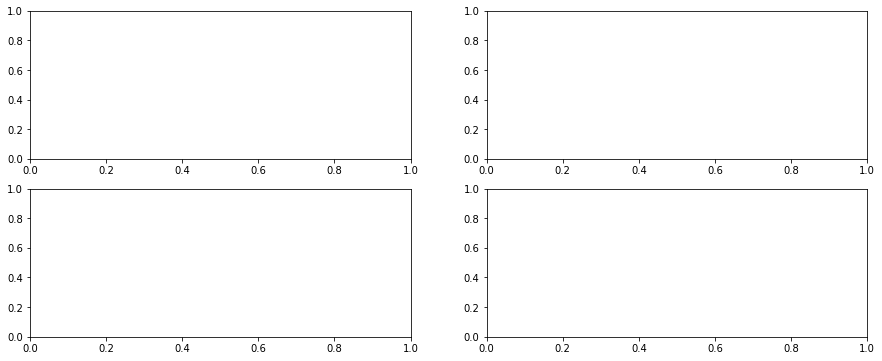

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 6))
clims = dict(hbo=[-20, 20], hbr=[-20, 20])
epochs['Control'].average().plot_image(axes=axes[:, 0], clim=clims)
epochs['Tapping'].average().plot_image(axes=axes[:, 1], clim=clims)
for column, condition in enumerate(['Control', 'Tapping']):
    for ax in axes[:, column]:
        ax.set_title('{}: {}'.format(condition, ax.get_title()))

In [ ]:
evoked_dict = {'Tapping/HbO': epochs['Tapping'].average(picks='hbo'),
               'Tapping/HbR': epochs['Tapping'].average(picks='hbr'),
               'Control/HbO': epochs['Control'].average(picks='hbo'),
               'Control/HbR': epochs['Control'].average(picks='hbr')}

# Rename channels until the encoding of frequency in ch_name is fixed
for condition in evoked_dict:
    evoked_dict[condition].rename_channels(lambda x: x[:-4])

color_dict = dict(HbO='#AA3377', HbR='b')
styles_dict = dict(Control=dict(linestyle='dashed'))

mne.viz.plot_compare_evokeds(evoked_dict, combine="mean", ci=0.95,
                             colors=color_dict, styles=styles_dict)